In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from pycaret.classification import *
import shap

import warnings
warnings.filterwarnings('ignore')

In [3]:
def count_pie_plot(
    datapie, datacount, colpiey, colcount, text1, text2,
    piecomap, xlabel, ylabel, xticklabel, yticklabel, ystart,
    yend, pielabels, yplus, piefs=10, countcomap=None,
    pctdistance=.65, fontsize=30, xtickrotation=None,
):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, nrows=1,
        facecolor="#FFFFFF",
        figsize=(24, 8)
    )
    
    datapie.plot(
        kind="pie",
        y=colpiey,
        autopct="%1.1f%%",
        labels=None,
        startangle=90,
        colors=piecomap,
        wedgeprops=dict(width=.15),
        pctdistance=pctdistance,
        fontsize=piefs,
        ax=ax1,
        textprops=dict(color="black", weight="bold")
    )
    
    sns.countplot(
        x=colcount,
        data=datacount,
        palette=countcomap,
        ax=ax2
    )
    
    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()
    
    ax1.text(
        x0, y1 * 1.40,
        text1, fontsize=fontsize,
        ha="left", va="center",
        weight="bold",
    )
    
    ax1.text(
        x0, y1 * 1.25,
        text2, fontsize=18,
        ha="left", va="center",
    )
    
    ax1.legend(
        pielabels, loc="upper left",
        bbox_to_anchor=(x0 * .01, y1 * .85),
        prop={"size": 15}, frameon=False,
        ncol=len(datapie)
    )
    
    ax2.set_xlabel(
        xlabel, weight="bold",
        labelpad=15, fontsize=15,
    )
    
    ax2.set_ylabel(
        ylabel, weight="bold",
        labelpad=15, fontsize=15,
    )
    
    ax2.set_xticklabels(
        labels=xticklabel, weight="semibold",
        fontsize=10, rotation=xtickrotation,
    )
    
    ax2.set_yticklabels(
        labels=yticklabel, weight="semibold",
        fontsize=10,
    )
    
    i = 0
    
    for p in ax2.patches:
        value = f"{p.get_height()}"
        if (i < 2):
            y1 = -2
        else:
            y1 = 2
        i += 1
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + yplus
        ax2.text(
            x, y, value, ha="center",
            va="center", fontsize=15, weight="semibold",
        )
        
    ax2.set_ylim(ystart, yend)
    ax2.set_facecolor("#FFFFFF")
    ax1.set_ylabel(None)
   
    plt.tight_layout()
    return fig

In [4]:
df = pd.read_csv('loan_data_2007_2014.csv', sep=',')

## 0. Data Understanding

**Deskripsi Kolom-Kolom Dari Dataset Pinjaman:**
    
`loan_amnt`: Jumlah total pinjaman yang diminta oleh peminjam.

`funded_amnt`: Jumlah total pinjaman yang didanai oleh investor.

`funded_amnt_inv`: Jumlah pinjaman yang didanai oleh investor individual.

`term`: Jangka waktu pelunasan pinjaman dalam bulan (contoh: 36 atau 60 bulan).

`int_rate`: Suku bunga pinjaman dalam persentase.

`installment`: Jumlah cicilan bulanan yang harus dibayar oleh peminjam.

`grade`: Peringkat kredit yang diberikan kepada peminjam oleh platform pinjaman.

`sub_grade`: Sub-peringkat kredit yang lebih rinci.

`emp_title`: Judul pekerjaan peminjam.

`emp_length`: Lama bekerja peminjam dalam tahun.

`home_ownership`: Status kepemilikan rumah peminjam (contoh: Rent, Own, Mortgage).

`annual_inc`: Penghasilan tahunan peminjam.

`verification_status`: Status verifikasi penghasilan peminjam.

`issue_d`: Tanggal penerbitan pinjaman.

`loan_status`: Status pinjaman (contoh: Fully Paid, Charged Off, Current).

`pymnt_plan`: Apakah ada rencana pembayaran (biasanya 'n' untuk tidak).

`url`: URL untuk detail pinjaman.

`desc`: Deskripsi pinjaman yang diberikan oleh peminjam.

`purpose`: Tujuan pinjaman (contoh: debt consolidation, home improvement).

`title`: Judul pinjaman yang diberikan oleh peminjam.

`zip_code`: Kode pos tempat tinggal peminjam.

`addr_state`: Negara bagian tempat tinggal peminjam.

`dti`: Debt-to-income ratio, rasio antara total utang dengan penghasilan peminjam.

`delinq_2yrs`: Jumlah kejadian gagal bayar dalam 2 tahun terakhir.

`earliest_cr_line`: Tanggal pembukaan rekening kredit pertama peminjam.

`inq_last_6mths`: Jumlah permintaan kredit dalam 6 bulan terakhir.

`mths_since_last_delinq`: Jumlah bulan sejak kejadian gagal bayar terakhir.

`mths_since_last_record`: Jumlah bulan sejak catatan kredit buruk terakhir.

`open_acc`: Jumlah akun kredit terbuka.

`pub_rec`: Jumlah catatan publik negatif (contoh: kebangkrutan, lien).

`revol_bal`: Saldo kredit bergulir (revolving balance).

`revol_util`: Persentase penggunaan kredit bergulir.

`total_acc`: Jumlah total akun kredit.

`initial_list_status`: Status daftar awal pinjaman (contoh: f untuk whole loan, w untuk fractional).

`out_prncp`: Prinsipal yang tersisa dari pinjaman.

`out_prncp_inv`: Prinsipal yang tersisa dari pinjaman bagi investor.

`total_pymnt`: Jumlah total pembayaran yang telah dilakukan.

`total_pymnt_inv`: Jumlah total pembayaran yang telah dilakukan oleh investor.

`total_rec_prncp`: Jumlah total prinsipal yang telah diterima kembali.

`total_rec_int`: Jumlah total bunga yang telah diterima kembali.

`total_rec_late_fee`: Jumlah total denda keterlambatan yang telah diterima.

`recoveries`: Jumlah yang telah dipulihkan dari pinjaman yang gagal bayar.

`collection_recovery_fee`: Biaya pemulihan dari koleksi pinjaman yang gagal bayar.

`last_pymnt_d`: Tanggal pembayaran terakhir.

`last_pymnt_amnt`: Jumlah pembayaran terakhir.

`next_pymnt_d`: Tanggal pembayaran berikutnya (jika ada).

`last_credit_pull_d`: Tanggal penarikan laporan kredit terakhir.

`collections_12_mths_ex_med`: Jumlah koleksi dalam 12 bulan terakhir, kecuali koleksi medis.

`mths_since_last_major_derog`: Jumlah bulan sejak kejadian kredit buruk besar terakhir.

`policy_code`: Kode kebijakan pinjaman.

`application_type`: Tipe aplikasi (contoh: Individual, Joint).

`acc_now_delinq`: Jumlah akun yang sedang gagal bayar.

`tot_coll_amt`: Jumlah total koleksi.

`tot_cur_bal`: Jumlah total saldo saat ini.

`total_rev_hi_lim`: Batas kredit bergulir tertinggi.

In [5]:
df['total_acc'].value_counts()

total_acc
21.0     17087
20.0     17073
22.0     17028
23.0     16719
19.0     16709
         ...  
106.0        1
156.0        1
101.0        1
96.0         1
118.0        1
Name: count, Length: 112, dtype: int64

In [6]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(466285, 75)

In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop(['Unnamed: 0', 'id', 'member_id'], axis=1)

## 1. Data Preprocessing

### <font color = 'darkgreen'> 1.1 Data Cleansing </font>

In [11]:
df_null = df.isna().sum().reset_index()
df_null = df_null.rename(columns={'index':'columns', 0:'total_null'})
df_null['null_pcg'] = (df_null['total_null'] / len(df)) * 100
df_isna = df_null[df_null['null_pcg']>0]
df_isna

,columns,total_null,null_pcg
8,emp_title,27588,5.916553
9,emp_length,21008,4.505399
11,annual_inc,4,0.000858
17,desc,340304,72.981975
19,title,21,0.004504
23,delinq_2yrs,29,0.006219
24,earliest_cr_line,29,0.006219
25,inq_last_6mths,29,0.006219
26,mths_since_last_delinq,250351,53.690554
27,mths_since_last_record,403647,86.566585


In [12]:
# menghapus kolom dengan banyak missing values
df_isna = df.isna().sum().reset_index()
df_isna.columns = ['columns', 'total']
df_isna['loss_pcg'] = (df_isna['total'] / len(df)) * 100
df_blanks = df_isna[df_isna['loss_pcg']>60]['columns']

In [13]:
df2 = df.copy()
df2 = df2.drop(columns=df_blanks, axis=1)

In [14]:
# Menghapus baris dengan sedikit missing values
df2.dropna(subset=['annual_inc', 'title', 'last_credit_pull_d'], inplace=True)

In [15]:
# Mengisi missing values dengan median untuk kolom tertentu
df2['inq_last_6mths'].fillna(df2['inq_last_6mths'].median(), inplace=True)
df2['open_acc'].fillna(df2['open_acc'].median(), inplace=True)
df2['delinq_2yrs'].fillna(df2['delinq_2yrs'].median(), inplace=True)
df2['pub_rec'].fillna(df2['pub_rec'].median(), inplace=True)
df2['total_acc'].fillna(df2['total_acc'].median(), inplace=True)
df2['collections_12_mths_ex_med'].fillna(df2['collections_12_mths_ex_med'].median(), inplace=True)
df2['acc_now_delinq'].fillna(df2['acc_now_delinq'].median(), inplace=True)

In [16]:
# Mengisi missing values dengan modus untuk kolom emp_length
emp_length_mode = df2['emp_length'].mode()[0]
df2['emp_length'].fillna(emp_length_mode, inplace=True)

In [17]:
# Mengisi missing values dengan modus untuk kolom emp_title
emp_title_mode = df['emp_title'].mode()[0]
df2['emp_title'].fillna(emp_title_mode, inplace=True)

In [18]:
# Mengisi missing values dengan modus untuk kolom earliest_cr_line
earliest_cr_line_mode = df2['earliest_cr_line'].mode()[0]
df2['earliest_cr_line'].fillna(earliest_cr_line_mode, inplace=True)

In [19]:
# Mengisi missing values dengan modus untuk kolom last_pymnt_d
last_pymnt_d_mode = df2['last_pymnt_d'].mode()[0]
df2['last_pymnt_d'].fillna(last_pymnt_d_mode, inplace=True)

In [20]:
# Mengisi missing values dengan nilai khusus
df2['mths_since_last_delinq'].fillna(-1, inplace=True)

In [21]:
# Mengisi missing values dengan mean untuk kolom numerik tertentu
df2['revol_util'].fillna(df2['revol_util'].mean(), inplace=True)
df2['tot_coll_amt'].fillna(df2['tot_coll_amt'].mean(), inplace=True)
df2['tot_cur_bal'].fillna(df2['tot_cur_bal'].mean(), inplace=True)
df2['total_rev_hi_lim'].fillna(df2['total_rev_hi_lim'].mean(), inplace=True)

In [22]:
# Menghapus kolom next_payment_d yang memiliki banyak nilai yang hilang
df2.drop(columns=['next_pymnt_d'], inplace=True)

In [23]:
df2.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

### <font color = 'darkgreen'> 2. Feature Transformation & Engineering </font>

In [24]:
# membuat kolom target dari kolom loan_status
df2['loan_status'].value_counts(normalize=True)

loan_status
Current                                                0.480895
Fully Paid                                             0.396192
Charged Off                                            0.091088
Late (31-120 days)                                     0.014800
In Grace Period                                        0.006748
Does not meet the credit policy. Status:Fully Paid     0.004249
Late (16-30 days)                                      0.002613
Default                                                0.001785
Does not meet the credit policy. Status:Charged Off    0.001630
Name: proportion, dtype: float64

**Berikut adalah penjelasan untuk label 0, 1, dan 2 dalam konteks prediksi kualitas pinjaman:**

- **Label 0: Good Loan:** 
1. Fully Paid: Pinjaman yang telah dilunasi sepenuhnya oleh peminjam.
2. Does not meet the credit policy. Status Paid: Pinjaman yang telah dilunasi sepenuhnya meskipun awalnya tidak memenuhi kebijakan kredit.

- **Label 0: Good Loan:** 
1. Charged Off: Pinjaman yang dianggap tidak dapat dikumpulkan oleh pemberi pinjaman dan telah dihapus dari neraca sebagai kerugian.
2. Late (31-120 days): Pinjaman yang terlambat lebih dari 30 hari namun kurang dari 120 hari.
3. Late (16-30 days): Pinjaman yang terlambat antara 16 dan 30 hari.
4. Default: Pinjaman yang gagal bayar.
5. Does not meet the credit policy. Status Off: Pinjaman yang gagal bayar meskipun awalnya tidak memenuhi kebijakan kredit.

- **Label 2: Undetermined/Current Loan:** 
1. Current: Pinjaman yang sedang berjalan dan belum jatuh tempo atau dalam pembayaran yang tertunda.
2. In Grace Period: Pinjaman yang dalam masa tenggang pembayaran setelah tanggal jatuh tempo.

In [25]:
status_mapping = {
    'Current': 2,  # Status belum pasti karena sedang berjalan
    'Fully Paid': 0,  # Good loan karena telah dilunasi
    'Does not meet the credit policy. Status:Fully Paid': 0,  # Good loan meskipun kebijakan kredit tidak dipenuhi
    'Charged Off': 1,  # Bad loan karena gagal bayar
    'Late (31-120 days)': 1,  # Bad loan karena keterlambatan yang signifikan
    'In Grace Period': 2,  # Status belum pasti sebab masih masa tenggang pembayaran
    'Late (16-30 days)': 1,  # Bad loan karena keterlambatan
    'Default': 1,  # Bad loan karena gagal bayar
    'Does not meet the credit policy. Status:Charged Off': 1  # Bad loan karena gagal bayar meskipun kebijakan kredit tidak dipenuhi
}

In [26]:
df2['target'] = df2['loan_status'].map(status_mapping)

In [27]:
# mengubah kolom menjadi datetime
df2['issue_d'] = pd.to_datetime(df2['issue_d'], format='%b-%y')
df2['last_pymnt_d'] = pd.to_datetime(df2['last_pymnt_d'], format='%b-%y')
df2['last_credit_pull_d'] = pd.to_datetime(df2['last_credit_pull_d'], format='%b-%y')

In [28]:
# menghitung durasi dalam bulan antara issue_d dan last_pymnt_d
df2['months_since_issue'] = (df2['last_pymnt_d'].dt.year - df2['issue_d'].dt.year) * 12 + (df2['last_pymnt_d'].dt.month - df2['issue_d'].dt.month)

In [29]:
# mengambil bulan dan tahun dari issue_d
df2['issue_month'] = df2['issue_d'].dt.month
df2['issue_year'] = df2['issue_d'].dt.year

In [30]:
# mengambil bulan dan tahun dari last_pymnt_d
df2['last_pymnt_month'] = df2['last_pymnt_d'].dt.month
df2['last_pymnt_year'] = df2['last_pymnt_d'].dt.year

In [31]:
# mengambil bulan dan tahun dari last_credit_pull_d
df2['last_credit_pull_month'] = df2['last_credit_pull_d'].dt.month
df2['last_credit_pull_year'] = df2['last_credit_pull_d'].dt.year

In [32]:
# mengelompokkan addr_state menjadi wilayah geografis
northeast = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA', 'Other']
midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
south = ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX']
west = ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']

df2['region'] = df2['addr_state'].apply(lambda x: 'Northeast' if x in northeast else 
                                                 'Midwest' if x in midwest else 
                                                 'South' if x in south else 
                                                 'West')

In [33]:
# mapping untuk kelompok purpose
purpose_mapping = {
    'debt_consolidation': 'personal',
    'credit_card': 'personal',
    'home_improvement': 'home',
    'other': 'other',
    'major_purchase': 'business',
    'small_business': 'business',
    'car': 'other',
    'medical': 'personal',
    'moving': 'personal',
    'vacation': 'personal',
    'wedding': 'personal',
    'house': 'home',
    'educational': 'other',
    'renewable_energy': 'home'
}

# Terapkan mapping ke kolom purpose untuk membuat kolom kelompok
df2['purpose_group'] = df2['purpose'].map(purpose_mapping)


### <font color = 'darkgreen'> 3. Feature Selection </font>

In [34]:
# menghapus kolom yang memiliki nilai seragam

uniform_columns = []

for i in df2.columns:
    if df2[i].nunique() == 1:
        uniform_columns.append(i)

uniform_columns

['policy_code', 'application_type']

**Berikut penjelasan mengapa setiap fitur yang disebutkan mungkin tidak diperlukan untuk prediksi apakah suatu pinjaman "good" atau "bad":**

- `application_type`: Hanya memiliki 1 nilai unik yang tidak menambah banyak informasi.

- `earliest_cr_line`: Fitur ini sudah diubah menjadi informasi yang lebih berguna seperti usia kredit dalam bulan (months_since_issue).

- `emp_title`: Sangat bervariasi dan mungkin tidak memberikan pola yang konsisten.

- `issue_d`: Sudah diubah menjadi fitur yang lebih berguna seperti months_since_issue, issue_month, dan issue_year.

- `last_credit_pull_d`: Tanggal ini mungkin tidak relevan untuk prediksi awal.

- `last_pymnt_d`: Sama seperti last_pymnt_amnt, ini hanya tersedia setelah pinjaman berjalan.

- `loan_status`: Ini adalah kolom target yang sedang kita prediksi, jadi tidak boleh digunakan sebagai fitur.

- `policy_code`: Bernilai sama untuk semua baris, tidak memberikan informasi tambahan.

- `pymnt_plan`: Bernilai sama dan tidak menambah informasi yang berguna.

- `title`: Redundan dengan purpose dan tidak menambah informasi signifikan.

- `url`: Tidak memberikan informasi relevan untuk prediksi.

- `zip_code`: Terlalu spesifik dan mungkin tidak memberikan informasi tambahan yang berguna.

- `addr_state`: Fitur ini sudah diubah menjadi informasi yang lebih berguna dengan mengelompokkan state berdasarkan wilayah geografis `region`.

- `issue_month` dan `issue_year`: Fitur-fitur ini adalah transformasi dari issue_d.

- `purpose`: sudah direpresentasikan dalam fitur lain `purpose_group`.

In [35]:
# menghapus fitur yang tidak relevan atau redundan

df3 = df2.drop(columns=['application_type', 'earliest_cr_line', 'emp_title', 
                        'issue_d', 'last_credit_pull_d', 
                        'last_pymnt_d', 'last_pymnt_amnt', 'loan_status', 'policy_code', 
                        'pymnt_plan', 'title', 'url', 'zip_code', 'addr_state',
                         'issue_month', 'issue_year', 'purpose'])

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466218 entries, 0 to 466284
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466218 non-null  int64  
 1   funded_amnt                 466218 non-null  int64  
 2   funded_amnt_inv             466218 non-null  float64
 3   term                        466218 non-null  object 
 4   int_rate                    466218 non-null  float64
 5   installment                 466218 non-null  float64
 6   grade                       466218 non-null  object 
 7   sub_grade                   466218 non-null  object 
 8   emp_length                  466218 non-null  object 
 9   home_ownership              466218 non-null  object 
 10  annual_inc                  466218 non-null  float64
 11  verification_status         466218 non-null  object 
 12  dti                         466218 non-null  float64
 13  delinq_2yrs        

## 2. Building Model ML

In [37]:
df3['target'].value_counts(normalize=True)

target
2    0.487643
0    0.400441
1    0.111915
Name: proportion, dtype: float64

### <font color = 'darkgreen'> 2.1 Setup Data </font>

In [39]:
feature_selected = df3[df3['target']!=2]
feature_selected['target'].value_counts(normalize=True)

target
0    0.781567
1    0.218433
Name: proportion, dtype: float64

In [40]:
feature_selected.select_dtypes(['object']).nunique()

term                    2
grade                   7
sub_grade              35
emp_length             11
home_ownership          6
verification_status     3
initial_list_status     2
region                  4
purpose_group           4
dtype: int64

In [41]:
le = LabelEncoder()

In [42]:
feature_selected['grade'] = le.fit_transform(feature_selected['grade'])
feature_selected['sub_grade'] = le.fit_transform(feature_selected['sub_grade'])
feature_selected['emp_length'] = le.fit_transform(feature_selected['emp_length'])

In [43]:
clf_setup = setup(data=feature_selected,
                  session_id=42,
                  categorical_features=['term', 'home_ownership', 'verification_status', 
                                        'initial_list_status', 'region', 'purpose_group'],
                  fix_imbalance=True,
                  fix_imbalance_method='smote',
                  normalize=True,
                  normalize_method='minmax',
                  remove_multicollinearity=True,
                  remove_outliers=False,
                  target='target',
                  train_size=0.8,
                 )

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(238870, 44)"
4,Transformed data shape,"(346482, 48)"
5,Transformed train set shape,"(298708, 48)"
6,Transformed test set shape,"(47774, 48)"
7,Numeric features,37
8,Categorical features,6
9,Preprocess,True


### <font color = 'darkgreen'> 2.2 Create Model ML </font>

In [44]:
best_model = compare_models(['lr', 'knn', 'svm', 'nb'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9799,0.9929,0.9547,0.9532,0.9539,0.9410,0.9410,13.6500
svm,SVM - Linear Kernel,0.9745,0.9934,0.9363,0.9465,0.9414,0.9251,0.9251,10.5990
nb,Naive Bayes,0.9197,0.9402,0.6504,0.9731,0.7796,0.7329,0.7552,10.4900
knn,K Neighbors Classifier,0.8548,0.8624,0.6239,0.6837,0.6524,0.5608,0.5618,60.0760


In [45]:
lr_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9805,0.9919,0.9566,0.9541,0.9554,0.9429,0.9429
1,0.9818,0.9929,0.9593,0.9577,0.9585,0.9468,0.9468
2,0.9783,0.9919,0.9538,0.9474,0.9506,0.9367,0.9367
3,0.9791,0.9921,0.9511,0.9532,0.9522,0.9388,0.9388
4,0.9794,0.9925,0.9559,0.9502,0.9531,0.9399,0.9399
5,0.9802,0.9938,0.9545,0.9549,0.9547,0.9421,0.9421
6,0.9807,0.9939,0.9554,0.9561,0.9558,0.9434,0.9434
7,0.9780,0.9925,0.9475,0.9516,0.9496,0.9355,0.9355
8,0.9807,0.9935,0.9557,0.9561,0.9559,0.9436,0.9436


### <font color = 'darkgreen'> 2.3 Model Evaluation </font>

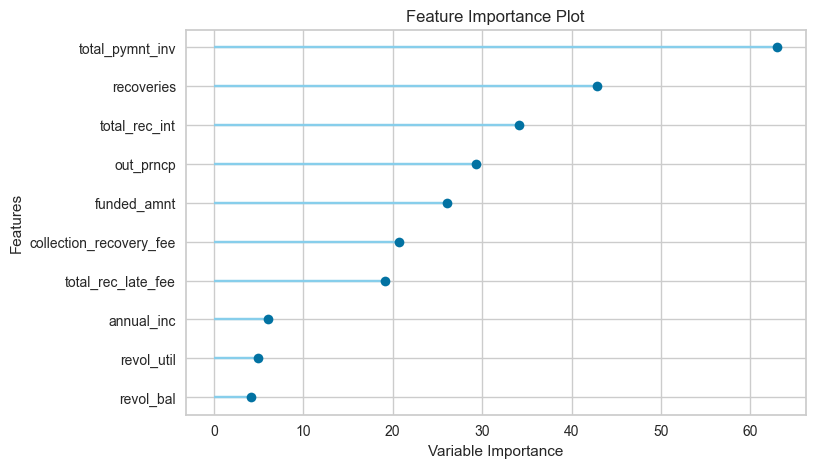

In [46]:
plot_model(lr_model, plot='feature')

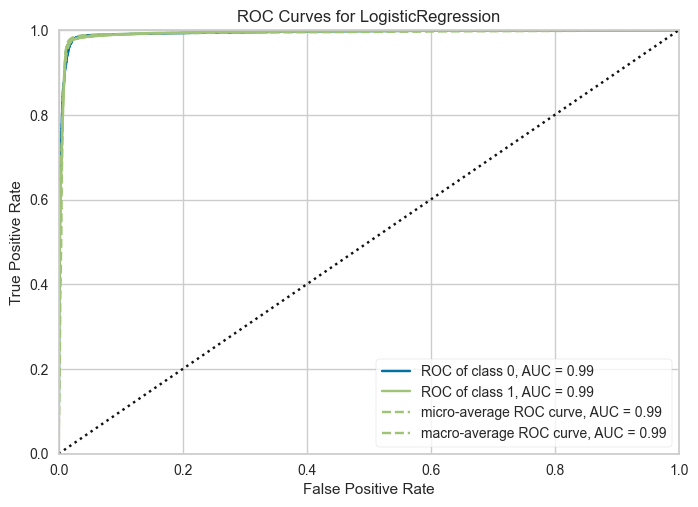

In [47]:
plot_model(lr_model, plot='auc')

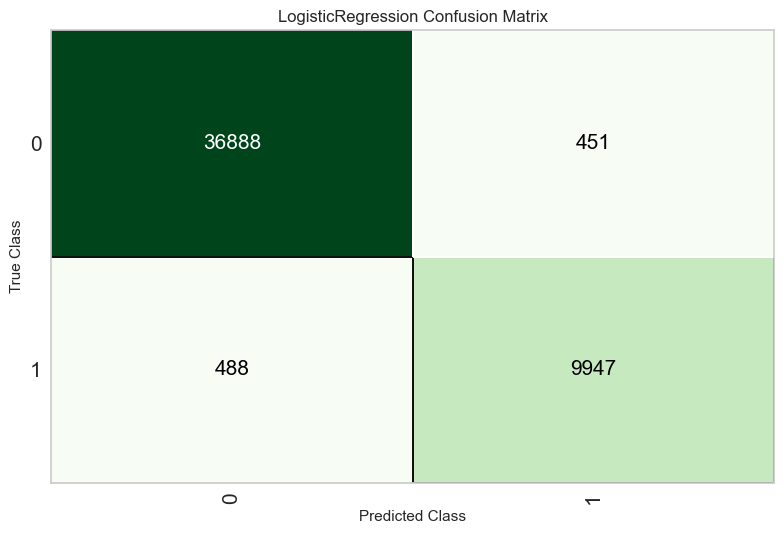

In [48]:
plot_model(lr_model, plot='confusion_matrix')

In [112]:
# save model
save_model(lr_model, 'lr_model_credit_prediction')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['loan_amnt', 'funded_amnt',
                                              'funded_amnt_inv', 'int_rate',
                                              'installment', 'grade',
                                              'sub_grade', 'emp_length',
                                              'annual_inc', 'dti', 'delinq_2yrs',
                                              'inq_last_6mths',
                                              'mths_since_last_delinq',
                                              'open_acc', 'pub_rec', 'revol_bal',
                                              'revol_util', 'total_acc',
                                              'out_prn...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=MinMaxScaler(clip=False,
      

In [118]:
# save dataset for load in gradio app
feature_selected.to_csv('feature_selected_dataset.csv', index=False)

In [119]:
feature_selected.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,tot_cur_bal,total_rev_hi_lim,target,months_since_issue,last_pymnt_month,last_pymnt_year,last_credit_pull_month,last_credit_pull_year,region,purpose_group
0,5000,5000,4975.0,36 months,10.65,162.87,1,6,1,RENT,...,138804.307387,30378.350919,0,37,1,2015,1,2016,West,personal
1,2500,2500,2500.0,60 months,15.27,59.83,2,13,10,RENT,...,138804.307387,30378.350919,1,16,4,2013,9,2013,South,other
2,2400,2400,2400.0,36 months,15.96,84.33,2,14,1,RENT,...,138804.307387,30378.350919,0,30,6,2014,1,2016,Midwest,business
3,10000,10000,10000.0,36 months,13.49,339.31,2,10,1,RENT,...,138804.307387,30378.350919,0,37,1,2015,1,2015,West,other
5,5000,5000,5000.0,36 months,7.90,156.46,0,3,3,RENT,...,138804.307387,30378.350919,0,37,1,2015,9,2015,West,personal


## 3. EDA

### <font color = 'darkgreen'> Univariate Analysis </font>

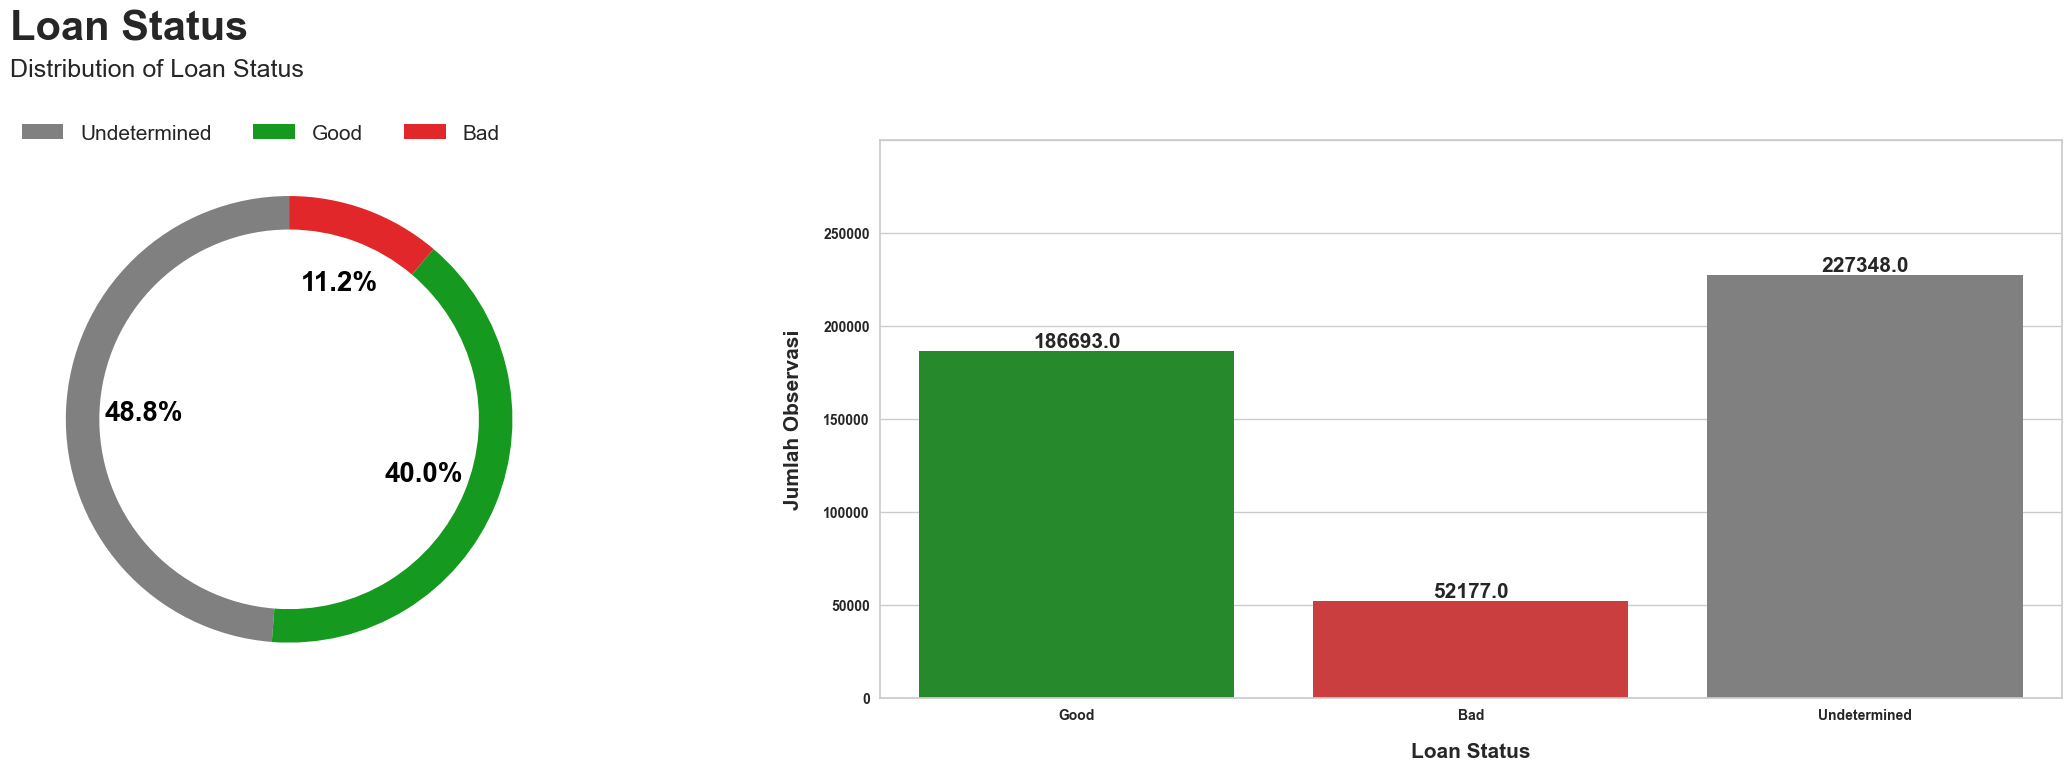

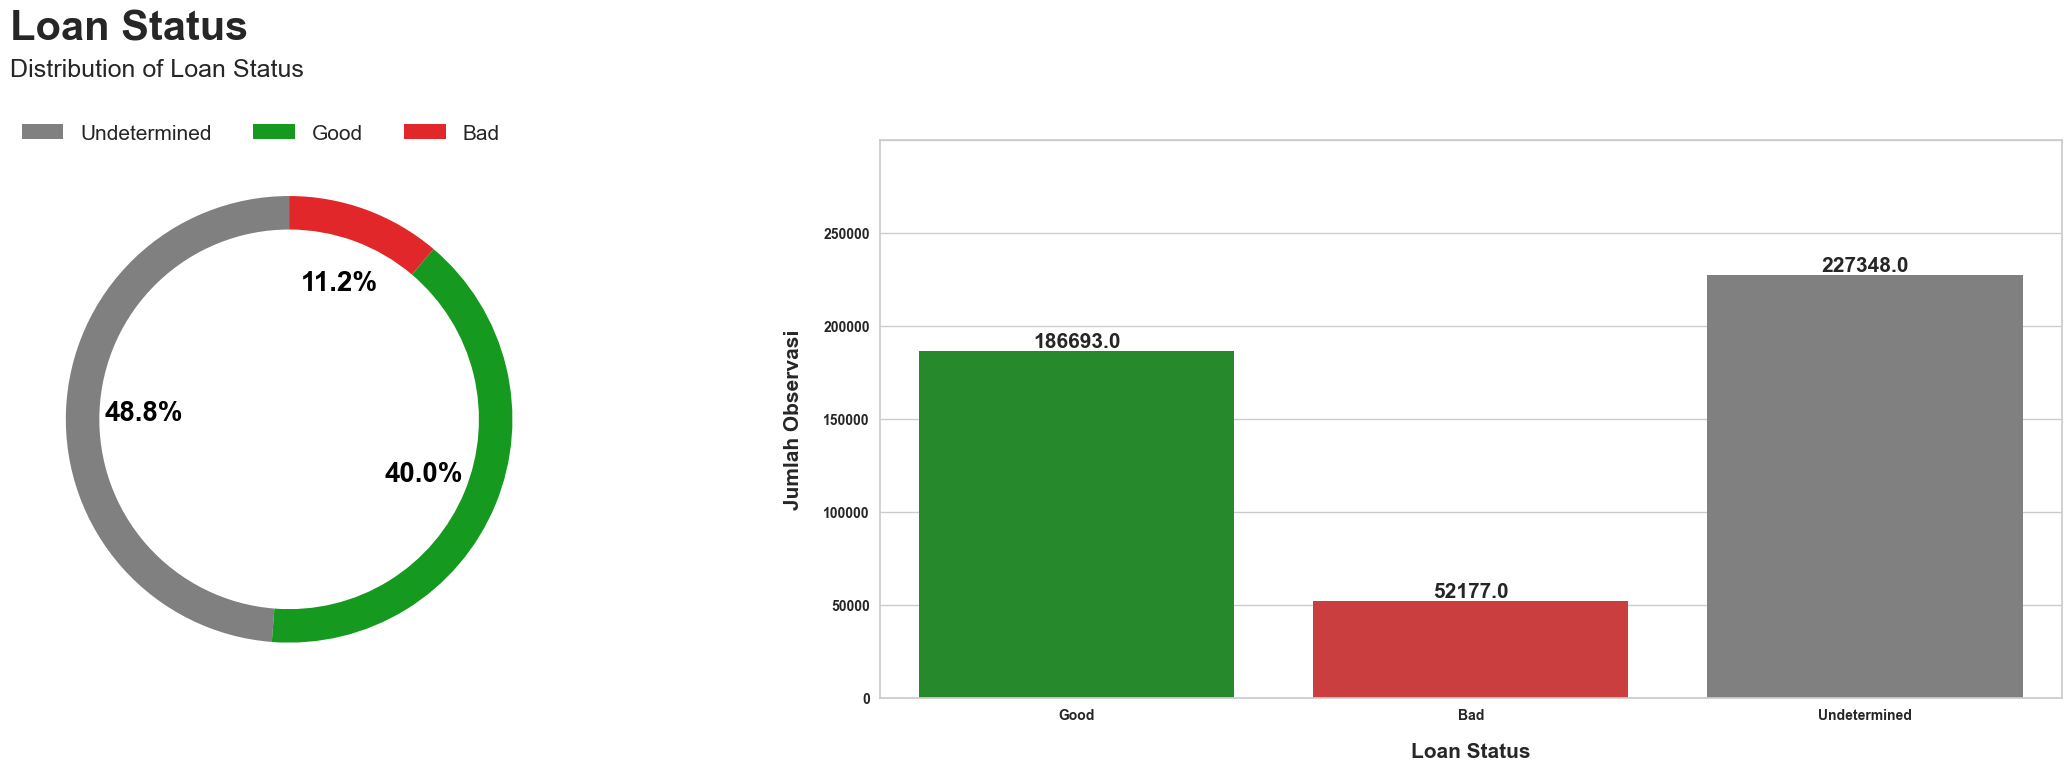

In [51]:
df_func = df3["target"].value_counts()

count_pie_plot(
    datapie= df_func,
    datacount= df3,
    colcount= "target",
    colpiey= df_func.values,
    text1= "Loan Status",
    pielabels= ["Undetermined", "Good", 'Bad'],
    text2= "Distribution of Loan Status",
    piecomap= ['gray', "#15991e", "#e12729"],
    countcomap= ["#15991e", "#e12729", 'gray'],
    xlabel= "Loan Status",
    piefs= 20,
    yplus= 5000,
    ylabel= "Jumlah Observasi",
    xticklabel= ["Good", "Bad", 'Undetermined'],
    yticklabel= list(np.arange(0, 260000, 50000)),
    ystart= 0,
    yend= 300000,
)

In [64]:
feature_selected.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'target', 'months_since_issue', 'last_pymnt_month', 'last_pymnt_year',
       'last_credit_pull_month', 'last_credit_pull_year', 'region',
       'purpose_group'],
      dtype='object')

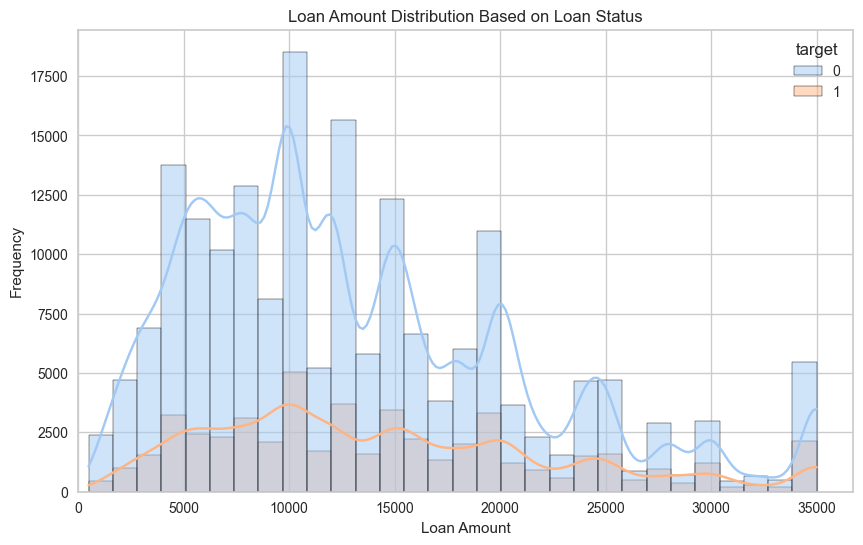

In [109]:
plt.figure(figsize=(10, 6))
sns.histplot(data=feature_selected, x='loan_amnt', bins=30, common_norm=False, kde=True, palette='pastel', hue='target')
plt.xlim(xmin=0)
plt.title("Loan Amount Distribution Based on Loan Status")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

In [110]:
term_counts = feature_selected.groupby(['term', 'target']).size().unstack()
term_percent = emp_length_counts.div(emp_length_counts.sum(axis=1), axis=0) * 100
term_percent

target,0,1
term,,
36 months,81.991482,18.008518
60 months,64.522465,35.477535


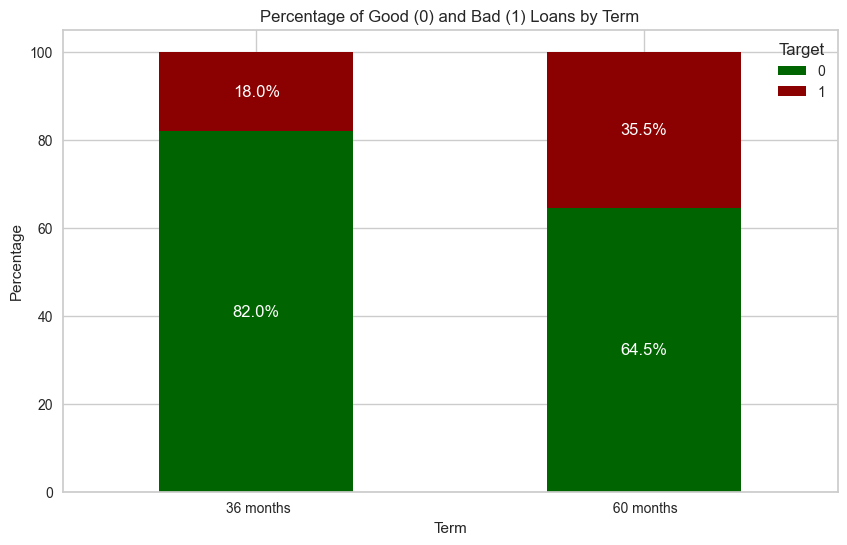

In [94]:
ax = emp_length_percent.plot(kind='bar', stacked=True, figsize=(10, 6), color=['darkgreen', 'darkred'])

plt.title('Percentage of Good (0) and Bad (1) Loans by Term')
plt.xlabel('Term')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Target')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, y + height/2, '{:.1f}%'.format(height), ha='center', va='center', color='white')
    
plt.show()

In [111]:
home_ownership_counts = feature_selected.groupby(['home_ownership', 'target']).size().unstack()
home_ownership_percent = home_ownership_counts.div(home_ownership_counts.sum(axis=1), axis=0) * 100
home_ownership_percent

target,0,1
home_ownership,,
ANY,100.000000,NaN
MORTGAGE,80.193253,19.806747
NONE,81.818182,18.181818
OTHER,78.770950,21.229050
OWN,76.918871,23.081129
RENT,76.037600,23.962400


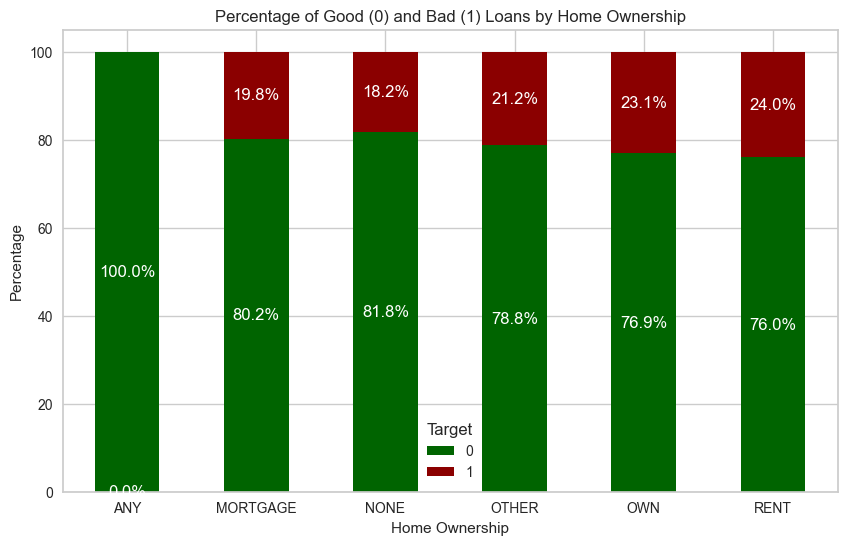

In [106]:
ax = home_ownership_percent.plot(kind='bar', stacked=True, figsize=(10, 6), color=['darkgreen', 'darkred'])
plt.title('Percentage of Good (0) and Bad (1) Loans by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Target')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, y + height/2, '{:.1f}%'.format(height), ha='center', va='center', color='white')

plt.show()

### <font color = 'darkgreen'> Bivariate Analysis </font>

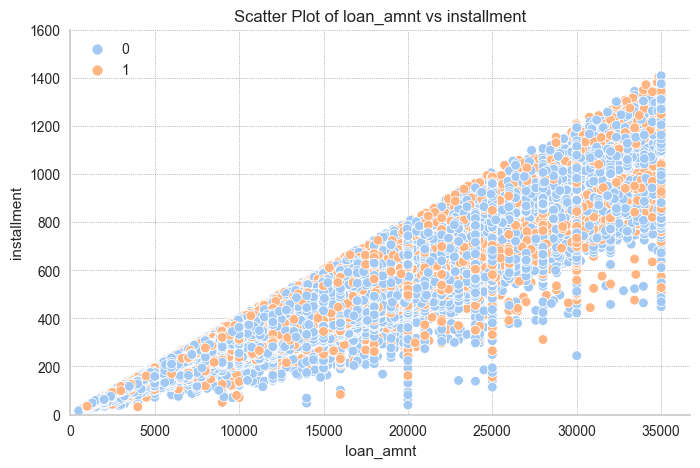

In [96]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=feature_selected, x='loan_amnt', y='installment', hue='target', palette='pastel')

y_tick_label, location = plt.yticks()
plt.yticks(y_tick_label, (y_tick_label/1).astype(int))

plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.title('Scatter Plot of loan_amnt vs installment')
plt.xlabel('loan_amnt')
plt.ylabel('installment')

plt.grid(True, linewidth=0.5, linestyle=':', color='gray')

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.legend(loc=2)

plt.show()

### <font color = 'darkgreen'> Multivariate Analysis </font>

In [58]:
num_cols = feature_selected.select_dtypes(include=['int', 'float'])

num_cols.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,...,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,months_since_issue,last_pymnt_month,last_pymnt_year,last_credit_pull_month,last_credit_pull_year
loan_amnt,1.000000,0.997306,0.988862,0.213047,0.955489,0.201178,0.209659,-0.034024,0.351763,0.059719,...,0.013029,-0.001848,0.271121,0.296092,0.074600,-0.074924,0.020380,0.120918,0.007699,0.060817
funded_amnt,0.997306,1.000000,0.992157,0.214979,0.959549,0.200935,0.209137,-0.034263,0.350609,0.061768,...,0.013348,-0.001852,0.271869,0.296777,0.074923,-0.080647,0.020415,0.128538,0.007025,0.065655
funded_amnt_inv,0.988862,0.992157,1.000000,0.217827,0.951127,0.194220,0.202195,-0.035760,0.345853,0.068267,...,0.013813,-0.001835,0.270264,0.294651,0.072782,-0.088348,0.023231,0.172444,0.006317,0.092236
int_rate,0.213047,0.214979,0.217827,1.000000,0.202971,0.944935,0.965251,-0.008746,-0.019165,0.172829,...,0.032356,0.000742,-0.092825,-0.153618,0.255568,-0.159245,0.007388,0.087889,-0.017883,0.076327
installment,0.955489,0.959549,0.951127,0.202971,1.000000,0.181259,0.188431,-0.031240,0.348484,0.061248,...,0.015695,-0.001474,0.243692,0.273278,0.055629,-0.073174,0.017562,0.125576,-0.002122,0.072614
grade,0.201178,0.200935,0.194220,0.944935,0.181259,1.000000,0.978131,-0.004050,-0.010852,0.143274,...,0.030726,0.000673,-0.077692,-0.130182,0.250597,-0.141181,0.003173,0.007580,-0.011453,0.023089
sub_grade,0.209659,0.209137,0.202195,0.965251,0.188431,0.978131,1.000000,-0.003749,-0.010415,0.147807,...,0.031715,0.001065,-0.079715,-0.134896,0.256292,-0.142914,0.002626,0.004026,-0.012034,0.021840
emp_length,-0.034024,-0.034263,-0.035760,-0.008746,-0.031240,-0.004050,-0.003749,1.000000,-0.024050,-0.018883,...,-0.003291,-0.003054,-0.023669,-0.035032,0.001600,0.016302,-0.003195,-0.039876,0.003137,-0.024591
annual_inc,0.351763,0.350609,0.345853,-0.019165,0.348484,-0.010852,-0.010415,-0.024050,1.000000,-0.176957,...,0.017158,0.002127,0.397069,0.274214,-0.060565,-0.028604,-0.003226,0.022225,-0.019848,0.019068
dti,0.059719,0.061768,0.068267,0.172829,0.061248,0.143274,0.147807,-0.018883,-0.176957,1.000000,...,0.010364,-0.003404,-0.017529,0.048877,0.128013,-0.067394,0.022677,0.157368,-0.029660,0.136009
